In [13]:
#import libraries
import random as rd
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
import cartopy.io.shapereader as shpreader
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from sklearn.cluster import KMeans
#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-13-f27bbb6f6f6b>:28: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [27]:
#read simulated data from APSIM Classic out files
filelist = glob.glob(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Maps\pdatesNASS\shppdates2\*.txt')
frame = pd.DataFrame()
list = []

for file in filelist:
    df = pd.read_csv(file)
    df['week'] = os.path.basename(file)
    a = df.drop(['Rowid_'], axis=1)   
    list.append(a)
    
df2 = pd.concat(list)

In [28]:
df2.loc[df2.week == 'week14.txt', 'DOY'] = 92
df2.loc[df2.week == 'week15.txt', 'DOY'] = 99
df2.loc[df2.week == 'week16.txt', 'DOY'] = 106
df2.loc[df2.week == 'week17.txt', 'DOY'] = 113
df2.loc[df2.week == 'week18.txt', 'DOY'] = 120
df2.loc[df2.week == 'week19.txt', 'DOY'] = 127
df2.loc[df2.week == 'week20.txt', 'DOY'] = 134
df2.loc[df2.week == 'week21.txt', 'DOY'] = 141
df2.loc[df2.week == 'week22.txt', 'DOY'] = 148
df2.loc[df2.week == 'week23.txt', 'DOY'] = 155
df2.loc[df2.week == 'week24.txt', 'DOY'] = 162
df2.loc[df2.week == 'week25.txt', 'DOY'] = 169

In [56]:
df2[(df2.FID == 101)]

FID  COUNT          AREA       MIN       MAX     RANGE      MEAN  \
56  101     36  2.915518e+09  0.227919  0.248156  0.020237  0.237907   
56  101     36  2.915518e+09  0.248184  0.257819  0.009634  0.253323   
56  101     36  2.915518e+09  0.244211  0.255904  0.011693  0.249886   
56  101     36  2.915518e+09  0.236315  0.248710  0.012395  0.242326   
56  101     36  2.915518e+09  0.244707  0.257475  0.012768  0.250971   
56  101     36  2.915518e+09  0.288658  0.299881  0.011223  0.294502   
56  101     36  2.915518e+09  0.336457  0.355216  0.018760  0.346002   
56  101     36  2.915518e+09  0.363512  0.379733  0.016221  0.371835   
56  101     36  2.915518e+09  0.371734  0.385027  0.013293  0.377885   
56  101     36  2.915518e+09  0.384678  0.397408  0.012730  0.390685   
56  101     36  2.915518e+09  0.396932  0.404045  0.007113  0.400349   
56  101     36  2.915518e+09  0.452642  0.465441  0.012800  0.457880   

         STD        SUM        week    DOY  
56  0.006301   8.564663  week14.txt   92.0  
56  0.002753   9.119623  week15.txt   99.0  
56  0.003651   8.995900  week16.txt  106.0  
56  0.003947   8.723733  week17.txt  113.0  
56  0.004186   9.034960  week18.txt  120.0  
56  0.003188  10.602088  week19.txt  127.0  
56  0.004972  12.456071  week20.txt  134.0  
56  0.004645  13.386050  week21.txt  141.0  
56  0.004438  13.603867  week22.txt  148.0  
56  0.004387  14.064668  week23.txt  155.0  
56  0.002426  14.412553  week24.txt  162.0  
56  0.003201  16.483677  week25.txt  169.0

In [50]:
pdate = df2[(df2.MEAN > 0.1) & (df2.MEAN < 0.2)]
pdate

FID  COUNT          AREA       MIN       MAX     RANGE      MEAN  \
0        5      3  2.429598e+08  0.185800  0.188029  0.002230  0.186872   
1        6      5  4.049330e+08  0.185246  0.192472  0.007225  0.188981   
2       12      1  8.098660e+07  0.191537  0.191537  0.000000  0.191537   
3       13     14  1.133812e+09  0.182027  0.192398  0.010371  0.186370   
4       14     26  2.105652e+09  0.181955  0.189816  0.007861  0.185133   
...    ...    ...           ...       ...       ...       ...       ...   
1584  1668     27  2.186638e+09  0.175715  0.187408  0.011693  0.182428   
1585  1669     26  2.105652e+09  0.173704  0.199380  0.025676  0.189015   
1616  1700     18  1.457759e+09  0.188296  0.205954  0.017658  0.195364   
1617  1701     28  2.267625e+09  0.177483  0.209685  0.032202  0.190074   
1618  1702     28  2.267625e+09  0.178493  0.213878  0.035385  0.197486   

           STD       SUM        week    DOY  
0     0.000912  0.560615  week14.txt   92.0  
1     0.002690  0.944907  week14.txt   92.0  
2     0.000000  0.191537  week14.txt   92.0  
3     0.003130  2.609177  week14.txt   92.0  
4     0.001733  4.813467  week14.txt   92.0  
...        ...       ...         ...    ...  
1584  0.002442  4.925549  week25.txt  169.0  
1585  0.006834  4.914379  week25.txt  169.0  
1616  0.005358  3.516555  week25.txt  169.0  
1617  0.008425  5.322066  week25.txt  169.0  
1618  0.010248  5.529601  week25.txt  169.0  

[3957 rows x 11 columns]

<AxesSubplot:ylabel='Frequency'>

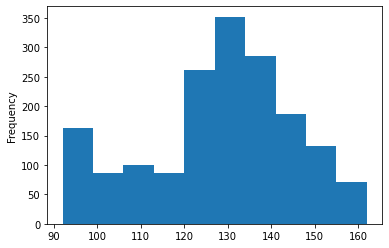

In [52]:
final = pdate.groupby(['FID'],as_index=False).mean()
final.DOY.plot.hist()

In [54]:
final.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Maps\pdatesNASS\shppdates2\pdates.csv')